In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### First, we can read the ratings in from the ratebeer dataset

*For the purposes of showing that we can handle the data, we are only working with the years of 2010 through 2012*

In [5]:
rb_ratings = pd.read_csv('ratings.csv')
rb_ratings.date = pd.to_datetime(rb_ratings.date, unit='s')
rb_ratings.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,2016-04-26 10:00:00,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2017-02-17 11:00:00,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-06-24 10:00:00,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-01-01 11:00:00,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-23 10:00:00,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...


In [6]:
# Keep only the ratings between 2010 and 2012
rb_ratings = rb_ratings[rb_ratings.date.dt.year.isin([2010, 2011, 2012])]

*We also read in the users file for the ratebeer dataset and remove any nulls. We can see that the number of users using the ratebeer dataset has increased year by year in the graph visualization below*

In [90]:
rb_users = pd.read_csv('users.csv')
rb_users.joined = pd.to_datetime(rb_users.joined, unit='s')
rb_users.head()


,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,2012-05-20 10:00:00,Poland
1,89,442761,MAGICuenca91,2017-01-10 11:00:00,Spain
2,169,288889,Sibarh,2013-11-16 11:00:00,Poland
3,3371,250510,fombe89,2013-03-22 11:00:00,Spain
4,13043,122778,kevnic2008,2011-02-02 11:00:00,Germany


In [8]:
# Remove users without a location
rb_users = rb_users[rb_users.location.notnull()]

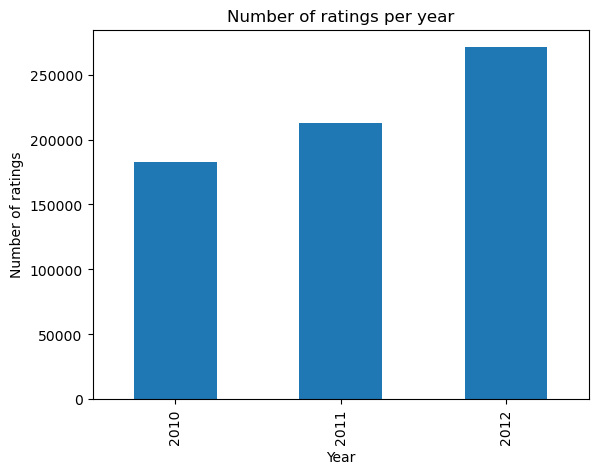

In [9]:
# Plot the distribution of the ratings per year
rb_ratings.date.dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of ratings per year')
plt.xlabel('Year')
plt.ylabel('Number of ratings')
plt.show()

## Filtering

We want to filter our data to exclude noise. Therefore, we group the number of ratings by location

Here we can see the number of unique ratings for each specific location by number

In [99]:
# Join ratings and users on user_id to count the number of ratings per location
rb_ratings_per_location = rb_ratings.merge(rb_users[['user_id', 'location']], on='user_id')
rb_ratings_per_location = rb_ratings_per_location.groupby('location').count()

# Create a new column with the number of ratings per location
rb_ratings_per_location['count'] = rb_ratings_per_location['user_id']
rb_ratings_per_location = rb_ratings_per_location[['count']]

# Sort by the number of ratings
rb_ratings_per_location = rb_ratings_per_location.sort_values(by='count', ascending=False)
rb_ratings_per_location.head()


# Converting from series object to dataframe
# Making a dictionary of frequencies so we have suitable format for merging. 
country_frequencies = {}
for country,count in rb_ratings_per_location.iterrows(): 
    count_parts = count.tolist()
    country_frequencies[country] = count_parts[0]

# Converting to values
dict_to_dataframe = {'location': list(country_frequencies.keys()), 'locations amount': list(country_frequencies.values())}
rb_ratings_per_location = pd.DataFrame.from_dict(dict_to_dataframe)
rb_ratings_per_location

   


,location,locations amount
0,Denmark,101276
1,Canada,69144
2,"United States, California",39572
3,Sweden,33766
4,Norway,33740
...,...,...
158,Montenegro,1
159,Cuba,1
160,Cayman Islands,1
161,Namibia,1


We can also see the frequency of each brewery in the ratings csv and remove the ones with almost no ratings

In [122]:
# Reading in breweries so that we only take from breweries that are in the top 10% to avoid noise

rb_breweries = pd.read_csv("breweries.csv")
rb_ratings_for_brewery = rb_ratings.merge(rb_breweries[['id', 'name']], left_on='brewery_id', right_on='id')
rb_ratings_for_brewery
rb_ratings_for_brewery = rb_ratings_for_brewery.groupby('brewery_name').count()

# Create a new column with the number of ratings per location
rb_ratings_for_brewery['count'] = rb_ratings_for_brewery['brewery_id']
rb_ratings_for_brewery = rb_ratings_for_brewery[['count']]

# Sort by the number of ratings
rb_ratings_for_brewery = rb_ratings_for_brewery.sort_values(by='count', ascending=False)
rb_ratings_for_brewery

brewery_frequencies = {}
for brewery,count in rb_ratings_for_brewery.iterrows(): 
    count_parts = count.tolist()
    brewery_frequencies[brewery] = count_parts[0]

dict_to_dataframe = {'brewery_name': list(brewery_frequencies.keys()), 'brewery_count': list(brewery_frequencies.values())}
rb_ratings_for_brewery = pd.DataFrame.from_dict(dict_to_dataframe)
rb_ratings_for_brewery



,brewery_name,brewery_count
0,Port Brewing Company / The Lost Abbey,12440
1,Lagunitas Brewing Company &#40;Heineken&#41;,9834
2,Nøgne Ø (Hansa Borg),8789
3,New Glarus Brewing Company,7090
4,Russian River Brewing,6216
...,...,...
5391,Strömsfors Bryggeri,1
5392,König-Sahl,1
5393,Browar Wielkopolski w Krotoszynie,1
5394,LM Brewery,1


#### Filtering 

For our actual filtering, now that we have merged ratings to have a lot of different statistics, we can filter ratings so that we only take locations with above a certain number of users. We assigned a random threshold for this value. We also wanted to only include users who gave too many ratings so we removed users with more than 90% ratings. Finally, we decided not to include breweries with super low counts as they could skew the data, so only breweries that had ratinsg above 25% were included. 

The final ratings dataframe has been filtered with all the criteria up above

In [128]:
# Filtering ratings so that users only come from countries with a certain number of ratings
# Also filtering ratings so that users above the 90th percentile ratings are not included because they could be a bit of an outlier




MIN_THRESHOLD_FOR_LOCATION = 10000 # We only want to keep ratings where the users are in countries above this min threshold
MAX_THRESHOLD_FOR_USER_RATINGS  = rb_users['nbr_ratings'].quantile(0.9) # Do not include users who have an excessive amount of ratings because they could reduce noise
MIN_THRESHOLD_FOR_BREWERIES = rb_ratings_for_brewery['brewery_count'].quantile(0.25) # Only consider ratings for breweries which are in the 75% of popularity






filtered_rb_ratings = rb_ratings.copy() # Copying existing dataframe

#



users_copy = rb_users.copy()
users_with_location_amount = pd.merge(users_copy, rb_ratings_per_location, on='location', how='left') 
ratings_with_user_stats = pd.merge(users_with_location_amount, rb_ratings, on = 'user_id', how = 'right') 
ratings_with_user_stats = pd.merge(ratings_with_user_stats, rb_ratings_for_brewery, on = 'brewery_name')

#Filtering statement
ratings_with_user_stats = ratings_with_user_stats[(ratings_with_user_stats['locations amount'] > MIN_THRESHOLD_FOR_LOCATION) & (ratings_with_user_stats['nbr_ratings'] < MAX_THRESHOLD_FOR_USER_RATINGS) & (ratings_with_user_stats['brewery_count'] > MIN_THRESHOLD_FOR_BREWERIES)]
ratings_with_user_stats



,nbr_ratings,user_id,user_name_x,joined,location,locations amount,beer_name,beer_id,brewery_name,brewery_id,...,date,user_name_y,appearance,aroma,palate,taste,overall,rating,text,brewery_count
229,22,124721,andsled,2011-03-05 11:00:00,England,18536.0,Hilden Twisted Hop,155275,Hilden,2099,...,2011-11-18 11:00:00,andsled,4,8,3,8,14,3.7,Wetherspoons middlesbrough. Beer was in top no...,179
246,1,206227,nniF,2012-07-21 10:00:00,Germany,33419.0,Whitewater Belfast Ale,31973,Whitewater,4347,...,2012-07-31 10:00:00,nniF,4,8,5,7,14,3.8,I dont like Guinness caused thats I had drunk ...,152
369,21,162009,Alexgc,2012-03-05 11:00:00,Norway,33740.0,Whitewater Crown & Glory,31974,Whitewater,4347,...,2012-06-10 10:00:00,Alexgc,4,5,2,4,6,2.1,From tap at mchugh's. Not very much here.. Lit...,152
421,1,72188,GonzoIllini,2008-03-25 11:00:00,"United States, Illinois",16178.0,N&R - Shot In The Dark,150375,Neill & Ross,13189,...,2012-06-16 10:00:00,GonzoIllini,4,6,4,8,8,3.0,"Purple / maroon colored, phenolic baby diaper...",39
460,51,109465,MikeyMalts,2010-07-07 10:00:00,"United States, California",39572.0,Strangford Lough Legbiter,37923,Strangford Lough,4959,...,2011-04-12 10:00:00,MikeyMalts,3,5,3,5,12,2.8,12oz btl from distributor rep. Poured in tulip...,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665973,9,99706,Randel,2010-01-05 11:00:00,"United States, California",39572.0,Chang Beer 6.4%,2245,Thai Beverages,391,...,2010-01-06 11:00:00,Randel,3,2,2,3,7,1.7,Aroma was a bit on the skunky side. Pours gold...,461
665976,6,33025,cheaphead,2006-02-02 11:00:00,Canada,69144.0,Chang Beer 6.4%,2245,Thai Beverages,391,...,2012-11-03 11:00:00,cheaphead,3,7,3,6,13,3.2,was in thailand and preferred chang over singh...,461
666006,1,134893,stamfordbus,2011-09-05 10:00:00,England,18536.0,Chang Beer 6.4%,2245,Thai Beverages,391,...,2011-09-05 10:00:00,stamfordbus,4,9,5,9,20,4.7,"Best beer in Thailand for price and taste, sha...",461
666012,2,91707,DrunkTailgater,2009-06-02 10:00:00,"United States, California",39572.0,Chang Beer 6.4%,2245,Thai Beverages,391,...,2011-05-22 10:00:00,DrunkTailgater,3,2,3,3,4,1.5,Just not a very good beer! Was kinda of skunky...,461


## Map 

*We also wanted to visualize the location of the different breweries so we were able to individually get the coordinates of each brewery based on it's location, and then make a heatmap on the world map. As expected, US cities were more hotspots rather than rural areas. For areas where we were just given countries, we used a predefined value from Open StreetMaps*

In [132]:
!pip install geopy
!pip install folium

from geopy.geocoders import Nominatim
import folium



(52.5310214, -1.2649062)


In [138]:

def geocode_location(location_name):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(location_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None

all_brewery_locations = rb_breweries['location'].tolist()
all_distinct_brewery_locations = list(set(all_brewery_locations))
brewery_latitudes_longitudes = []
for location in all_distinct_brewery_locations:
    res = geocode_location(location)
    if res:
        lat,long = res
        brewery_latitudes_longitudes.append([lat, long])
print(brewery_latitudes_longitudes)



  




[[32.3635964, 35.561242], [13.8000382, -88.9140683], [56.7861112, -4.1140518], [10.2116702, 38.6521203], [-41.5000831, 172.8344077], [-13.2687204, 33.9301963], [42.5869578, 20.9021231], [8.7800265, 1.0199765], [44.3053476, 17.5961467], [41.1927739, -95.4256198], [7.0323598, 19.9981227], [64.4459613, -149.680909], [35.8323648, 38.5414697], [40.0796606, -89.4337288], [45.3658443, 15.6575209], [9.5293472, 2.2584408], [43.7323492, 7.4276832], [-19.9160819, -175.202642], [44.6471761, -100.348761], [43.6447642, -114.015407], [24.0002488, 53.9994829], [-32.8755548, -56.0201525], [53.4250605, 27.6971358], [-6.8699697, -75.0458515], [30.8703881, -92.007126], [64.9841821, -18.1059013], [39.3181528, -79.8109014], [-0.2864982, 36.0514231], [35.8681298, -90.9456751], [38.4758406, -80.8408415], [22.0452303, 96.4514694], [47.3752671, -109.638757], [49.4566233, -2.5822348], [2.9368696, 115.4443356], [12.90447, -61.2765569], [3.9767059, -73.1493675], [36.638392, 127.6961188], [4.5693754, 102.2656823], 

In [142]:
from folium.plugins import HeatMap
from IPython.display import display


map_center = [sum(p[0] for p in brewery_latitudes_longitudes) / len(brewery_latitudes_longitudes), sum(p[1] for p in brewery_latitudes_longitudes) / len(brewery_latitudes_longitudes)]
my_map = folium.Map(location=map_center, zoom_start=4)

# Add the heatmap layer
HeatMap(brewery_latitudes_longitudes).add_to(my_map)

# Save the map to an HTML file
display(my_map)


# Reading in external datasets


In [144]:
!pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/1d/cf/31387b40d64f56631ad7eb3dfecd922ff17b2c3131a4765c7102743f4c0f/fiona-1.9.5-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/51.1 kB ? eta -:--:--
     ------------------------------ ------- 41.0/51.1 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 524.0 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/43/d0/cbe29a4dcf38ee7e72bf695d0d3f2bee21b4f22ee6cf579ad974de9edfc8/pyproj-3.6.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://fil

#### Languages dataframe

In [167]:
import geopandas as gpd

My_file_path_name = r'C:\Users\rishi\Desktop\EPFL\Courses\ADA\ada-2023-project-vivalavada\World_Languages.dbf'

languages_table = gpd.read_file(My_file_path_name)

import pandas as pd
languages_table = pd.DataFrame(languages_table)
languages_table.columns
languages_table.drop(['OBJECTID', 'SOVEREIGNT', 'TYPE_', 
       'SECOND_OFF', 'THIRD_OFFI', 'ENGLISH_FI', 'FRENCH_FIR', 'ARABIC_FIR',
       'SPANISH_FI', 'PORTUGUESE', 'CHINESE_FI', 'RUSSIAN_FI', 'WORLD_LANG',
       'geometry'], axis = 1)


,COUNTRY,FIRST_OFFI
0,Botswana,English
1,Central African Republic,French
2,Canada,English
3,Switzerland,German
4,Chile,Spanish
...,...,...
229,United Republic of Tanzania,Swahili
230,Uganda,English
231,Ukraine,Ukrainian
232,United States Minor Outlying Islands,English


#### Population dataframe

In [267]:
world_population_df = pd.read_csv("world_population.csv")
world_population_df = world_population_df.drop(['Rank', 'CCA3', 'Capital', 'Continent',
        '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'], axis = 1)
world_population_df.rename(columns={'Country/Territory': 'location', '2022 Population': '2022'}, inplace=True)
world_population_df

,location,2022
0,Afghanistan,41128771
1,Albania,2842321
2,Algeria,44903225
3,American Samoa,44273
4,Andorra,79824
...,...,...
229,Wallis and Futuna,11572
230,Western Sahara,575986
231,Yemen,33696614
232,Zambia,20017675


In [269]:
US_state_populations = pd.read_csv("2022USPopulation.csv")
US_state_populations = US_state_populations.drop(['April 2020 estimate', ' July 1 2020 estimate',
       ' 2021',], axis = 1)
US_state_populations.rename(columns={'Geographic Area': 'location', '2022 Population': 'pop'}, inplace=True)
US_state_populations.columns
US_state_populations

# rows = US_state_populations.filter(like='California') 



,location,2022
0,United States,"333,287,557"
1,Northeast,"57,040,406"
2,Midwest,"68,787,595"
3,South,"128,716,192"
4,West,"78,743,364"
5,Alabama,"5,074,296"
6,Alaska,"733,583"
7,Arizona,"7,359,197"
8,Arkansas,"3,045,637"
9,California,"39,029,342"


### Picking Locations

First, we want to filter users who have above the 90th percentile of number of ratings because they could be skewing the results

In [312]:
merged_users = pd.read_csv("dataset/MergedData/users.csv")

threshold_for_ratings = merged_users['nbr_ratings'].quantile(0.9)
merged_users = merged_users[merged_users['nbr_ratings'] <= threshold_for_ratings]
merged_users

,nbr_ratings,user_id,user_name,joined,location,nbr_reviews
17,3,217452,Kingink,1.347876e+09,Scotland,NaN
30,1,69327,jclaude,1.202468e+09,NaN,NaN
33,3,198957,Rowlymo,1.341137e+09,NaN,NaN
35,8,224156,genegenie,1.350986e+09,Northern Ireland,NaN
72,82,447005,samdee,1.486120e+09,France,NaN
...,...,...,...,...,...,...
220853,1,everman.532342,Everman,1.291115e+09,"United States, California",1.0
220854,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California",1.0
220855,1,kyungsup.982216,Kyungsup,1.430561e+09,NaN,0.0
220856,1,joetex.800347,JoeTex,1.400234e+09,"United States, California",1.0


Then using that merged user data, we can create a grouping of the locations we want to analyze. Specifically, we wish to look at the ratio of the number of unique users (which we already filtered by their number of ratings) versus the size of the territory they are in. We will only keep locations above a certain threshhold. 

In [314]:


num_users_for_each_location = merged_users[['location']].value_counts()
num_users_for_each_location = num_users_for_each_location.reset_index()
num_users_for_each_location.columns = ['location', 'Count']
num_users_for_each_location # Storing the number of each users for each location in a dataframe

US_state_populations_dict = {}  # Making a dictionary for easier access to get the populations of each us state
for index,row in US_state_populations.iterrows():
    new_string = row[' 2022'].replace(',', '')
    US_state_populations_dict[row['location'].strip()] = int(new_string) # convert population counts to integer

country_populations_dict = {} # Create population counts for each country
for index,row in world_population_df.iterrows():
    country_populations_dict[row['location'].strip()] = int(row['2022'])
    



locations = {}
for index, row in num_users_for_each_location.iterrows():
    location = row["location"]
    if location.startswith("United States"): # For states, get the part after the comma 
        parts = location.split(',')
        state = parts[1].strip()
        locations[state] = row['Count']/US_state_populations_dict[state] # Get the ratio of users to the Population
    else :
        if row["location"] in country_populations_dict: # Some countries are not present in the countries dataset or the format is wrong so we ignore those locations
            country = row["location"].strip()
            locations[country] = row['Count']/country_populations_dict[country] 

print(locations)  

        

        


{'California': 0.0003217835442882947, 'Pennsylvania': 0.000678306704713719, 'New York': 0.0003859806737265979, 'Illinois': 0.000554044052661764, 'Texas': 0.00021232403845116408, 'Massachusetts': 0.0009087687808634063, 'Canada': 0.00014476914392494764, 'Florida': 0.00022931178189190357, 'Ohio': 0.0004307566362806308, 'Michigan': 0.00046062865746080393, 'New Jersey': 0.0004177419283438168, 'Virginia': 0.00042574415114251325, 'North Carolina': 0.0003331160850672303, 'Washington': 0.00042706028652726903, 'Minnesota': 0.0005296313709686447, 'Georgia': 0.00026913162029881035, 'Indiana': 0.0004127008239528046, 'Wisconsin': 0.0004626189152078586, 'Connecticut': 0.0007415466031291668, 'Colorado': 0.0004553139885676634, 'Maryland': 0.00039710219217280434, 'Oregon': 0.0004436177415965569, 'Missouri': 0.00030414585274711367, 'Australia': 6.727173536972503e-05, 'Alabama': 0.00033344527004337154, 'Arizona': 0.000217007371864077, 'Tennessee': 0.0002039328984183004, 'Poland': 3.5301073370910035e-05, '